In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline



In [23]:
# Reading in the Moon data (full moon phase vs. Other)
moon_file = "/Users/zainmaster/Desktop/Homeworks/Zain/Moon_Data_Full_Other.csv" 
full_moon_df = pd.read_csv(moon_file)

# Reducing the size of the file to just the columns of interest
full_moon_df = full_moon_df[['Moon Phase', 'Date' ]]

# Converting the Date column to be datetime
full_moon_df['Date'] = pd.to_datetime(full_moon_df['Date'])

# Checking to see if what the data types are and conversion is successful

full_moon_df.info()
display(full_moon_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Moon Phase  537 non-null    object        
 1   Date        537 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 8.5+ KB


,Moon Phase,Date
0,Other,2024-01-11
1,Other,2024-01-17
2,Full Moon,2024-01-25
3,Other,2024-02-09
4,Other,2024-02-16
...,...,...
532,Other,2014-12-14
533,Other,2014-12-22
534,Other,2014-12-28
535,Full Moon,2015-01-05


In [13]:
# Reading in MD Auto Traffic Violations data that was cleaned up previously and setting 'Date' to be the index
traffic_violations_file ="/Users/zainmaster/Desktop/Homeworks/Zain/Traffic_Violations.csv"  
traffic_violations_df = pd.read_csv(traffic_violations_file)

# Converting the Date column to be datetime
traffic_violations_df['Date Of Stop'] = pd.to_datetime(traffic_violations_df['Date Of Stop']).dt.date
traffic_violations_df['Date Of Stop'] = pd.to_datetime(traffic_violations_df['Date Of Stop'])
traffic_violations_df = traffic_violations_df.sort_values(by='Date Of Stop')
traffic_violations_df = traffic_violations_df.rename(columns={'Date Of Stop':'Date'})

# Checking to see if what the data types are and conversion is successful
traffic_violations_df.info()
display(traffic_violations_df.head())

/var/folders/n0/pbfvzgnj0db4mnvdjytkzzc00000gn/T/ipykernel_8427/1475851390.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_violations_df['Date Of Stop'] = pd.to_datetime(traffic_violations_df['Date Of Stop']).dt.date


<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 168573 to 127970
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Date            1048575 non-null  datetime64[ns]
 1   Time Of Stop    1048575 non-null  object        
 2   Description     1048567 non-null  object        
 3   Year            1043042 non-null  float64       
 4   Make            1048552 non-null  object        
 5   Model           1048497 non-null  object        
 6   Color           1036213 non-null  object        
 7   Violation Type  1048575 non-null  object        
 8   Race            1048575 non-null  object        
 9   Gender          1048575 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 88.0+ MB


,Date,Time Of Stop,Description,Year,Make,Model,Color,Violation Type,Race,Gender
168573,2012-01-01,3:34:00,DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE,2001.0,FORD,TAURUS,RED,Citation,WHITE,M
1006195,2012-01-01,2:31:00,DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,1999.0,FORD,VAN,NaN,Citation,WHITE,F
612823,2012-01-01,3:05:00,POSSESSING SUSPENDED LIC.,1997.0,HONDA,ACCORD,BLACK,Citation,WHITE,M
140247,2012-01-01,1:42:00,DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,2001.0,DODGE,DURANGO,BLUE,Citation,WHITE,F
263449,2012-01-01,3:34:00,FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...,2001.0,FORD,TAURUS,RED,Citation,WHITE,M


In [22]:
# Chopping the dataset to limit to columns of interest
traffic_violations_filtered = traffic_violations_df[['Date', 'Description']]
traffic_violations_filtered = traffic_violations_filtered.reset_index()
traffic_violations_filtered =  traffic_violations_filtered.drop('index', axis=1)
display(traffic_violations_filtered)

,Date,Description
0,2012-01-01,DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE
1,2012-01-01,DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...
2,2012-01-01,POSSESSING SUSPENDED LIC.
3,2012-01-01,DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...
4,2012-01-01,FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...
...,...,...
1048570,2025-01-19,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...
1048571,2025-01-19,OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY
1048572,2025-01-19,FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...
1048573,2025-01-19,EXCEEDING POSTED MAXIMUM SPEED LIMIT: 88 MPH I...


In [26]:
# Slice data to match date range of moon dataset
traffic_violations_sliced = traffic_violations_filtered.set_index('Date')
traffic_violations = traffic_violations_sliced.loc['2015-01-13':'2024-12-31']
display(traffic_violations)

,Description
Date,
2015-01-13,EXCEEDING MAXIMUM SPEED: 49 MPH IN A POSTED 40...
2015-01-13,EXCEEDING MAXIMUM SPEED: 39 MPH IN A POSTED 30...
2015-01-13,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...
2015-01-13,DRIVING VEH IN EXCESS OF REASONABLE AND PRUDEN...
2015-01-13,FAILURE TO STOP AT STOP SIGN
...,...
2024-12-31,EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH
2024-12-31,EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH
2024-12-31,FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...


In [27]:
# Merging datasets 'Moon' data and 'traffic' data, merged on the RIGHT cos we have a larger crime data set than a moon data set. 
# Assigning NaN's with 'Other' moon phase to fill in data gaps on the moon phase
# This data set is also the most granular (ALL Traffic) data set 
traffic_moon_merged_df = pd.merge(full_moon_df, traffic_violations, on='Date', how='right').fillna('Other')
traffic_moon_merged_df = traffic_moon_merged_df.sort_values(by='Date').reset_index()
traffic_moon_merged_df = traffic_moon_merged_df.drop('index', axis=1)

display(traffic_moon_merged_df.head())
traffic_moon_merged_df.info()
                            

,Moon Phase,Date,Description
0,Other,2015-01-13,EXCEEDING MAXIMUM SPEED: 49 MPH IN A POSTED 40...
1,Other,2015-01-13,DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...
2,Other,2015-01-13,FAILURE TO SECURELY FASTEN REGISTRATION PLATE ...
3,Other,2015-01-13,FAILURE TO SECURELY FASTEN REGISTRATION PLATE ...
4,Other,2015-01-13,EXCEEDING THE POSTED SPEED LIMIT OF 30 MPH


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716387 entries, 0 to 716386
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Moon Phase   716387 non-null  object        
 1   Date         716387 non-null  datetime64[ns]
 2   Description  716387 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 16.4+ MB


In [28]:
# Aggregrating the total number of offenses on day (as there are multiple crimes per day)
violations_by_day = traffic_moon_merged_df.groupby('Date').agg({'Description':'count'})
display(violations_by_day)


,Description
Date,
2015-01-13,900
2015-01-14,371
2015-01-15,228
2015-01-16,478
2015-01-17,323
...,...
2024-12-27,255
2024-12-28,163
2024-12-29,164


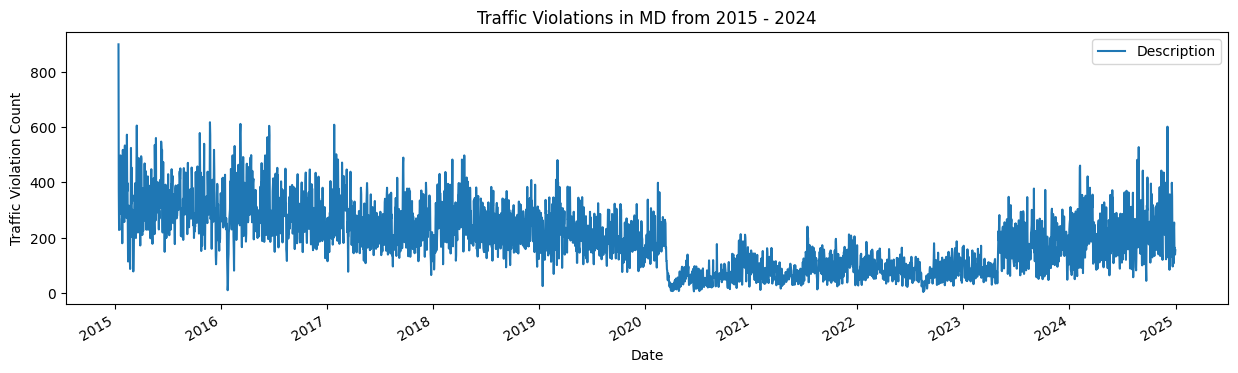

In [30]:
# Resetting index so that I can plot the data
violations_to_plot = violations_by_day.reset_index()
violations_to_plot.plot(x='Date', y='Description', kind='line', figsize=(15,4))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic Violation Count')
plt.title('Traffic Violations in MD from 2015 - 2024')

# Show the plot
plt.show()

In [31]:
display(violations_to_plot)

,Date,Description
0,2015-01-13,900
1,2015-01-14,371
2,2015-01-15,228
3,2015-01-16,478
4,2015-01-17,323
...,...,...
3634,2024-12-27,255
3635,2024-12-28,163
3636,2024-12-29,164
3637,2024-12-30,139


In [32]:
# Can see that theres a drop off in traffic violations issued between 2020 - 2023, probably influenced by COVID and then WFH that impacted time on roads
# Reducing the dataset to remove this outlier, suggest dropping data in 2020

traffic_filtered = violations_to_plot.set_index('Date')
traffic_filtered = traffic_filtered.loc['2015-01-13':'2020-01-01']
display(traffic_filtered)

,Description
Date,
2015-01-13,900
2015-01-14,371
2015-01-15,228
2015-01-16,478
2015-01-17,323
...,...
2019-12-28,152
2019-12-29,163
2019-12-30,110


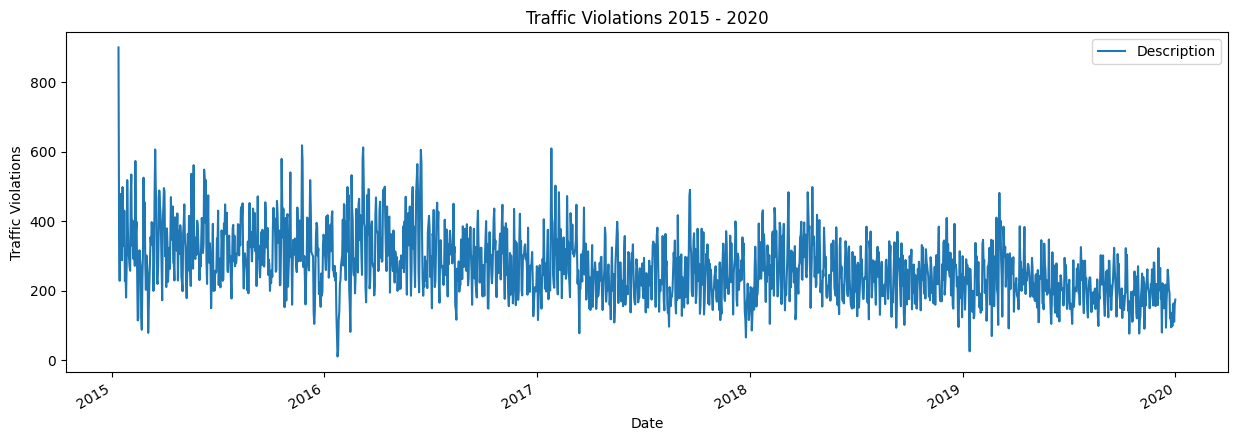

In [33]:
# Plot of crime for years 2015 - 2020 (cutting out COVID driving data)
# Resetting index so that I can plot the data
traffic_to_plot2 = traffic_filtered.reset_index()
traffic_to_plot2.plot(x='Date', y='Description', kind='line', figsize=(15,5))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic Violations')
plt.title('Traffic Violations 2015 - 2020')

# Show the plot
plt.show()

In [34]:
# Merging this data now with Moon Phase Data
violations_by_day_moon_merged_df = pd.merge(full_moon_df, traffic_filtered, on='Date', how='right').fillna('Other')
violations_by_day_moon_merged_df = violations_by_day_moon_merged_df[['Date', 'Moon Phase', 'Description']]
display(violations_by_day_moon_merged_df)

,Date,Moon Phase,Description
0,2015-01-13,Other,900
1,2015-01-13,Other,900
2,2015-01-14,Other,371
3,2015-01-15,Other,228
4,2015-01-16,Other,478
...,...,...,...
1812,2019-12-28,Other,152
1813,2019-12-29,Other,163
1814,2019-12-30,Other,110
1815,2019-12-31,Other,160


The lower quartile of issued traffic violations is: 199.0
The upper quartile of issued traffic violations is: 323.0
The interquartile range of issued traffic violations is: 124.0
The the median of issued traffic violations is: 259.0 
Values below 13.0 could be outliers.
Values above 509.0 could be outliers.


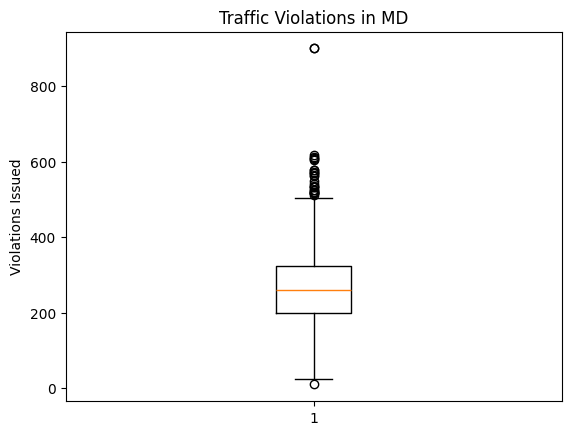

In [37]:
# Looking to understand what are my outliers are (spikes observed) and my normal data distribution
violations = violations_by_day_moon_merged_df['Description']


Q1 = violations.quantile(0.25)
median = violations.quantile(0.5)
Q3 = violations.quantile(0.75)
IQR = Q3 - Q1

print(f"The lower quartile of issued traffic violations is: {Q1}")
print(f"The upper quartile of issued traffic violations is: {Q3}")
print(f"The interquartile range of issued traffic violations is: {IQR}")
print(f"The the median of issued traffic violations is: {median} ")

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Traffic Violations in MD')
ax1.set_ylabel('Violations Issued')
ax1.boxplot(violations)
plt.show()

In [38]:
# OUTLIER TRAFFIC VIOLATION DATA > Creating separate dataset with ONLY Outliers to then compare to phases of moon to see if FUll Moon had any effect on it
traffic_outlier = violations_by_day_moon_merged_df.loc[(violations_by_day_moon_merged_df['Description'] > 323)]
outlier_total = traffic_outlier['Date'].count()
outlier_fullmoons = (traffic_outlier['Moon Phase'] == 'Full Moon').sum()

print(f'Total # of traffic violations that lie outside of norm: {outlier_total}')
print(f'Total number of full moons that occured during this period are: {outlier_fullmoons}')
print(f'Outlier traffic violations are only influenced by {(outlier_fullmoons/outlier_total)*100} %')


Total # of traffic violations that lie outside of norm: 452
Total number of full moons that occured during this period are: 18
Outlier traffic violations are only influenced by 3.982300884955752 %


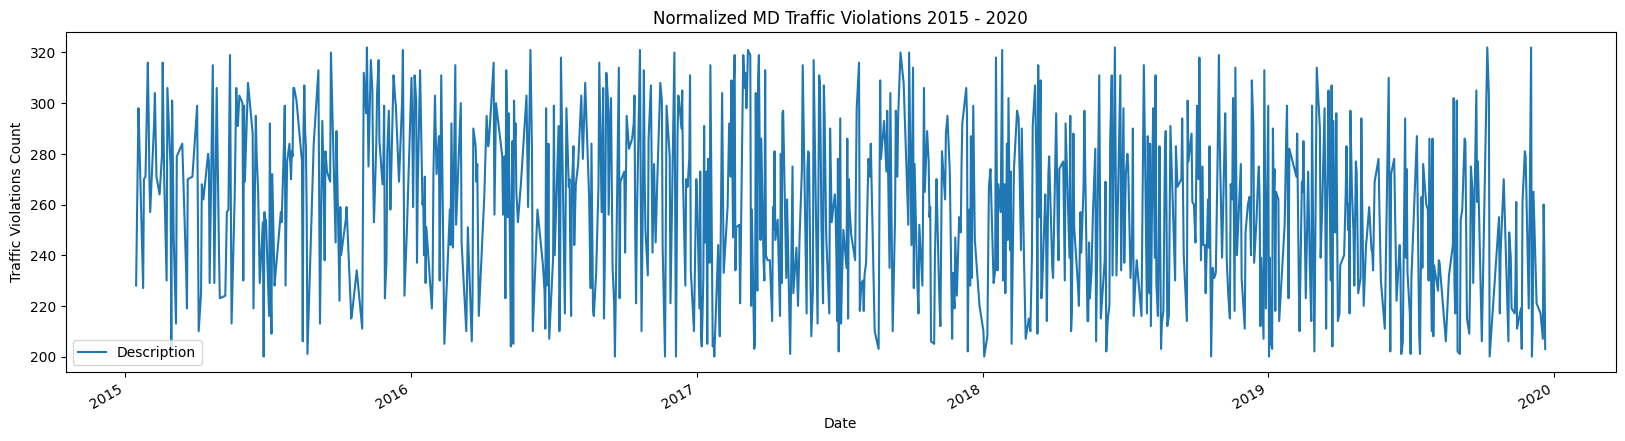

In [42]:
# NORMALIZED CRIME DATA (Sans Outliers) 
traffic_norm = violations_by_day_moon_merged_df.loc[(violations_by_day_moon_merged_df['Description'] > 199) &
                                                (violations_by_day_moon_merged_df['Description'] < 323)] 


#plotting just the normalized crime data
violations_to_plot3 = traffic_norm.reset_index()
violations_to_plot3.plot(x='Date', y='Description', kind='line', figsize=(20,5))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic Violations Count')
plt.title('Normalized MD Traffic Violations 2015 - 2020')
# Show the plot
plt.show()



In [43]:
#Overlaying moon data onto the normalized LA crime data 
#Full Moon dates are marked in red
fullmoon_only_violations = traffic_norm.loc[traffic_norm['Moon Phase'] == 'Full Moon']
viloations_to_plot5 = fullmoon_only_violations.reset_index()

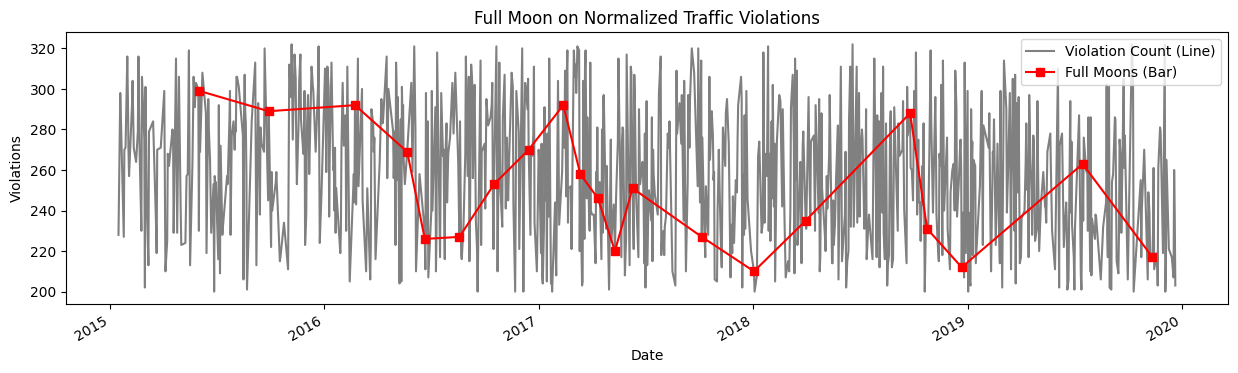

In [44]:
fig2, ax = plt.subplots()

# Plot the line chart
violations_to_plot3.plot(x='Date', y='Description', kind='line', figsize=(15,4), color='gray', ax=ax) 

# Plot the FULL MOON on top as a line chart
viloations_to_plot5.plot(x='Date', y='Description', marker="s", kind='line', figsize=(15,4), color='red', ax=ax) 

# Customize the plot (optional)
plt.xlabel('Date')
plt.ylabel('Violations')
plt.title('Full Moon on Normalized Traffic Violations')
plt.legend(['Violation Count (Line)', 'Full Moons (Bar)'])
plt.show()

In [45]:
# So how do the median number of crimes on Full Moon days vs. Non Full Moon Days
median_full_moon = fullmoon_only_violations['Description'].mean()

median_other_moon = traffic_norm.loc[traffic_norm['Moon Phase'] == 'Other', ['Description']].mean()

print(f'The comparision of non-full moon crime to full moon crime: {median_full_moon / median_other_moon}')

The comparision of non-full moon crime to full moon crime: Description    0.971154
dtype: float64


In [50]:
# Since crime on full moon days is within normal deviations. Is there a specific type of crime that is popular on full moon days? 
Specific_traffic_violations_full_moon = traffic_moon_merged_df.loc[traffic_moon_merged_df['Moon Phase'] == 'Full Moon', :].reset_index()
violations_grouped_full_moon = Specific_traffic_violations_full_moon.groupby(['Description']).count()
highest_traffic_incident = violations_grouped_full_moon.sort_values('Date', ascending=False).reset_index()

print(f'The type of crime that occurs the most on Full Moon days is: {highest_traffic_incident.iloc[0,0]}')
print(f'The type of crime that occurs the 2nd most on Full Moon days is: {highest_traffic_incident.iloc[1,0]}')
highest_traffic_incident =  highest_traffic_incident.drop('index', axis=1)
display(highest_traffic_incident.head(10))

The type of crime that occurs the most on Full Moon days is: DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS
The type of crime that occurs the 2nd most on Full Moon days is: FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND


,Description,Moon Phase,Date
0,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,1629,1629
1,FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,856,856
2,FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,820,820
3,PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,780,780
4,DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,623,623
5,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,617,617
6,DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,605,605
7,DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...,584,584
8,NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,581,581
9,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,545,545


In [52]:
# Are these any different than normal (Other Moon days)?
traffic_grouped_all_data = traffic_moon_merged_df.groupby(['Description']).count().sort_values('Date', ascending=False).reset_index()

print(f'The type of traffic violation that occurs the most on Full Moon days is: {traffic_grouped_all_data.iloc[0,0]}')
print(f'The type of crime that occurs the 2nd most on Full Moon days is: {traffic_grouped_all_data.iloc[1,0]}')
display(traffic_grouped_all_data.head(10))

The type of traffic violation that occurs the most on Full Moon days is: DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS
The type of crime that occurs the 2nd most on Full Moon days is: FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND


,Description,Moon Phase,Date
0,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,46294,46294
1,FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,25999,25999
2,FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,24633,24633
3,PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,22648,22648
4,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,19223,19223
5,DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,19131,19131
6,NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,17876,17876
7,DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,17470,17470
8,DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...,17306,17306
9,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,16486,16486


In [57]:
# Is there more Racisim on days with full moon vs. other
traffic_race = traffic_violations_df[['Date', 'Description', 'Race']]

# Merge this traffic race data with moon data
traffic_race_moon_merged_df = pd.merge(full_moon_df, traffic_race, on='Date', how='right').fillna('Other')
traffic_race_moon_merged_df = traffic_race_moon_merged_df.sort_values(by='Date').reset_index()
traffic_race_moon_merged_df = traffic_race_moon_merged_df.drop('index', axis=1)

# Full Moon influence on race of driver
traffic_grouped_race = traffic_race_moon_merged_df.groupby(['Race']).count().sort_values('Date', ascending=False).reset_index()

print(f'The type of race to recieve most traffic violation that occurs on Full Moon days is: {traffic_grouped_race.iloc[0,0]}')
print(f'The type of crime that occurs the 2nd most on Full Moon days is: {traffic_grouped_race.iloc[1,0]}')
display(traffic_grouped_race.head(10))

The type of race to recieve most traffic violation that occurs on Full Moon days is: WHITE
The type of crime that occurs the 2nd most on Full Moon days is: BLACK


,Race,Moon Phase,Date,Description
0,WHITE,342140,342140,342140
1,BLACK,331044,331044,331044
2,HISPANIC,259975,259975,259975
3,OTHER,63617,63617,63617
4,ASIAN,51221,51221,51221
5,NATIVE AMERICAN,1686,1686,1686
